In [34]:
import hml_equation_parser as hep
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import numpy as np
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
mnist=fetch_openml("mnist_784",version=1)
X, y = mnist["data"], mnist["target"]
y=y.astype('int')
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

### CH 3. 분류

☐ MNIST
    𝐎 MNIST 이미지 분류기 
      - 28X28 픽셀 단위로 각 픽셀당 0~255 사이에 값이 저장 되어있고 수 많은 미국 고등학생 등의 사람들이 적은 숫자들 사진을 7000개를 보유하고 있음
      - 이 사진들을 이용하여 분류기를 훈련시키고 임의의 숫자 손글씨 사진을 넣어서 숫자를 (T,F => 이진분류기)맞추거나 주변이 더러운 숫자를 깨끗한 숫자로 만드는 등 분류 기초단계 연습에 좋은 data

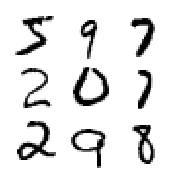

In [33]:
plt.figure(figsize=(3,3))
example_images = np.r_[X[:1200:600], X[1300:3060:600], X[3060:5000:600]]
plot_digits(example_images, images_per_row=3)

In [55]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9633 , 0.95695, 0.9146 ])

SGD(확률적 기울기 하강)을 선택, 대량의 데이터일 경우 효과적  
SGD : 한 번에 한 개씩 독립적으로 훈련을 하므로 온라인학습에 알맞음  
데이터가 overfitting 되는 것을 방지하기 위해 교차검증(cross-validation)을 사용하였고 fold값을 3으로 했고 평균이 94% 이상인 분류기를 완성 가능.

#### 3.3  
그러나 이미지의 10% 정도만 숫자 5이기 때문에 모든 예측을 '5아님'으로 예측 할 경우 90% 정확도를 보인다, 이 처럼 불균형한 데이터셋을 다룰 때 정확한 성능을 나타내지 못 하므로 정확도를 분류기의 성능 측정 지표로 선호하지 않는다.

#### 오차 행렬

<p class="HStyle0" style="margin-left:40.6pt;text-indent:-40.6pt;">
<table border="1" cellspacing="0" cellpadding="0" style="border-collapse:collapse;border:none;">
<tbody><tr>
	<td width="190" height="25" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0">실제&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 예측</p>
	</td>
	<td width="190" height="25" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">Positive</p>
	</td>
	<td width="190" height="25" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">Negative</p>
	</td>
</tr>
<tr>
	<td width="190" height="38" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">Positive</p>
	</td>
	<td width="190" height="38" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">TP(True Positive)</p>
	<p class="HStyle0" style="text-align:center;">양성 예측이 맞음</p>
	</td>
	<td width="190" height="38" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">FN(False Negative)</p>
	<p class="HStyle0" style="text-align:center;">양성 예측이 틀림</p>
	</td>
</tr>
<tr>
	<td width="190" height="38" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">Negative</p>
	</td>
	<td width="190" height="38" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">FP(False Positive)</p>
	<p class="HStyle0" style="text-align:center;">음성 예측이 틀림</p>
	</td>
	<td width="190" height="38" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="text-align:center;">TN(True Negative)</p>
	<p class="HStyle0" style="text-align:center;">음성 예측이 맞음</p>
	</td>
</tr>
</tbody></table></p>

In [67]:
y_train_pred=sgd_clf.predict(X_train)
confusion_matrix(y_train_5, y_train_pred)

array([[54148,   431],
       [ 1394,  4027]], dtype=int64)

⋅정확도(Accuracy) =  $\frac{ TP + TN } { TP + TN + FP + FN }$  
⋅정밀도(Precision) =  $\frac{ TP } { FP + TP }$  
⋅재현율(Recall) = $\frac{ TP } { FN + TP }$

![img](img/threshold.png)

결정 임계값 : 각 샘플의 점수가 임계값보다 크면 양성 클래스에 할당  
임계값을 높이면 정밀도가 높아지고 낮추면 재현율이 올라간다.	

(-700000, 700000)

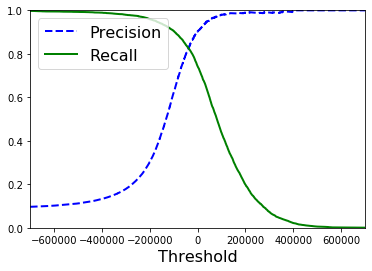

In [83]:
y_scores=sgd_clf.decision_function(X_train)
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

#plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])

※ 정밀도와 재현율은 한 가지 답으로 올인하면 100%가 나오기 떄문에 이를 통한 혼란을 방지하고자 f1 score을 사용한다  
⋅F1 Score : 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 갖음

<td width="559" height="172" valign="middle" style="border-left:solid #000000 0.4pt;border-right:solid #000000 0.4pt;border-top:solid #000000 0.4pt;border-bottom:solid #000000 0.4pt;padding:1.4pt 5.1pt 1.4pt 5.1pt">
	<p class="HStyle0" style="margin-left:41.1pt;text-indent:-41.1pt;">precision과 recall의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다.</p>
	<p class="HStyle0" style="margin-left:41.1pt;text-align:center;text-indent:-41.1pt;"><span style="font-family:&quot;휴먼명조&quot;;"></span><span style="font-size:13.0pt;font-family:&quot;HY헤드라인M&quot;;font-weight:&quot;bold&quot;;line-height:160%;"> $F _ { \beta } = \frac{ (1 + \beta ^ { 2 } )(precision \times recall) } { (\beta ^ { 2 } precision + recall) }$ </span></p>
	<p class="HStyle0" style="margin-left:41.1pt;text-indent:-41.1pt;">Beta가 1인 경우를 특별수 F1-score라고 한다.</p>
	<p class="HStyle0" style="margin-left:41.1pt;text-align:center;text-indent:-41.1pt;"><span style="font-family:&quot;휴먼명조&quot;;"></span><span style="font-size:13.0pt;font-family:&quot;HY헤드라인M&quot;;font-weight:&quot;bold&quot;;line-height:160%;">$F _ { 1 } = \frac{ 2 \bullet precision \bullet recall } { (precision + recall) }$</span></p>
	</td>

### ROC Curve
ROC Curve : 거짓 양성 비율(False Positive Rate)에 대한 진짜 양성 비율(True Positive Rate, 민감도, 재현율)의 곡선  
  
FPR =$\frac{FP}{TM+FP}$: 양성으로 잘못 분류된 음성 샘플의 비율 = 1 – 음성으로 정확하게 분류한 음성 샘플의 비율  
TNR(특이도)=$\frac{TN}{FP+TN}$ : 음성으로 정확하게 분류한 음성 샘플의 비율  
ROC Curve : 민감도(재현율)에 대한 1 – 특이도 그래프  
$FPR=\frac{FP}{FP+TN}=\ \frac{FP+TN-TN}{FP+TN}=1-\ \frac{TN}{FP+TN}=1-TNR$  
  
AUC(Area Under the Curve, 곡선 아래의 면적)을 측정하면 분류기들을 비교, 완벽한 분류기는 AUC가 1이다  
  
정밀도/재현율( PR ) vs ROC – 훈련 데이터에 양성 클래스가 적거나, 거짓 음성보다 거짓 양성이 중요할 때 PR곡선 사용

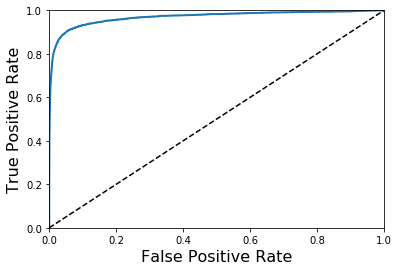

In [86]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plot_roc_curve(fpr, tpr)

#### 3.4  
 ☐ 다중 분류
    𝐎 다중분류기에 종류
      - RandomForest, Naive Bayes 등의 Algorithm은 하나의 분류기를 사용하여 여러 개의 클래스를  처리 가능
      - SVM, 선형분류기 등(이진 분류기)의 Algorithm은 여러 개의 분류기를 사용하여 여러 개의 클래스를 처리 가능
 ※ RandomForest 같은 분류기를 통한 예측은 확률(predict_proba())로 선택
 ※ SGD(선형 분류기) 같은 분류기를 통한 예측은 결정 점수(decision_function())로 선택
    𝐎 OVA (One-Versus-All, One-Versus-the-rest, 일대다) 
      - 분류해야할 개수를 N이라고 하면 각 분류대상을 분류하는 N개의 분류기를 만들어 훈련시킨 후 분류 대상이 왔을 때 각 분류기가 decision_function()을 통해 결정 점수가 나오는데 그 중 가장 높은 것을 Class로 선택(ex ‘5’ or ‘5아님’ => ‘5’의 점수)
      - SVM같은 훈련 세트의 크기에 민감한 Algorithm들이 아닌 대부분의 이진 분류 Algorithm이 선호
     - 다중 클래스 분류 작업에 이진 분류 Algorithm을 선택하면 scikit learn이 자동으로 감지해 OvA, SVM분류기일 때는 OvO를 적용.
    𝐎 OVO (One-Versus-One, 일대일) 
      - 분류해야할 개수를 N이라고 하면 각 분류대상을 분류하는 N(N-1)/2 (== )개의 분류기를 만들어 훈련시킨 후 분류 대상이 왔을 때 개의 분류기 모두를 통과시켜서 가장 많이 양성으로 분류된 Class를 선택(ex 1 vs 2, 1 vs 3 ... => 가장 많이 나온 Class 선택) 
      - 장점으로는 각 분류기의 훈련에 전체 훈련세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것.
      - SVM 같은 훈련 세트의 크기에 민감한 Algorithm들은 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다 작은 훈련세트에서 많은 분류기를 훈련시키는 쪽이 빠르므로 OVO를 선호
 ※ scikit learn에서 OvO나 OvA를 강제로 사용하도록 하려면 OneVsOneClassifier나 OneVsRestClassifier를 사용하면 됨 



#### 3.5  
Error 분석
      - 오차 행렬(confusion matrix)을 matshow()를 활용하여 이미지로 보는 것이 편리함
      - 절대 개수가 아니라 (해당 cell들의 값) / (실제값 총합)으로 하는 에러 비율로 비교하는 것이 좋음( 단, 이때 주대각선 값은 0으로 통일)
      - 모든 숫자를 한 번에 보는 것이 어려우니 유독 상호적으로 혼란이 오는 것이 있는 것들을 쌍으로 묶어 오차행렬처럼 이미지를 띄워서 보면 편함
      - SGD Classifier는 선형분류기이며 선형분류기는 Class마다 pixel에 가중치를 할당하고 새로운 이미지에 대해 단순히 pixel 강도의 가중치 합을 Class의 점수로 계산을 함 (예를 들어 3과 5는 몇 개의 pixel만 다르기 때문에 model이 쉽게 혼동하여 잘못된 분류가 많음) 



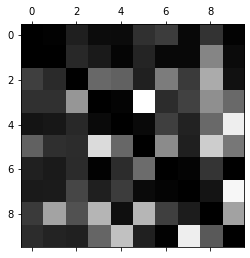

In [90]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

#### 3.6  
다중label 분류
      - 분류기가 샘플마다 여러 개의 class를 출력해야 할 경우 (ex 사진에 있는 사람들 이름)
      - f1_score(y_test, y_pred, average = “binary”, “micro”, “macro” or “weighted” or “accuracy”)
	※ None : 각 class의 점수가 반환
	※ binary : class들이 y_test와 y_pred가 이진일 경우에만 적용가능
	※ micro : TP, FN, FP을 계산하여 전체적으로 metric을 계산
	※ macro : 단순평균
	※ weighted : 각 class는 표본의 개수로 가중평균
	※ samples : 각 instance의 지표를 계산하고 평균을 찾으십시오 ( accuracy_score 점수와 다른 다중 label 분류에만 의미가 있음).
	※ accuracy : 정확도, 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율
평가 방법 : F1 score 또는 이진 분류 지표의 평균
#### 3.7  
다중 출력 분류
      - 다중 출력 다중 calss 분류(multioutput-multiclass classification)